Standard libraries

For a complete list of Python standard library and their documentation look at the Python Manual. A few to mention are:

-math                                          for numeric and math-related functions and data types
-urllib                                         for fetching data across the web
-datetime                                    for manipulating dates and times
-pickle and cPickle                    for serializing and deserializing data structures enabling us to save our variables on the disk and load them from the disk
-os                                              for operating system dependent functions

In [2]:
import os
os.getcwd()

"C:\\Users\\god's pride"

In [3]:
os.name

'nt'

In [4]:
pip install urllib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement urllib
ERROR: No matching distribution found for urllib


In [5]:
import urllib as url

In [6]:
requ=url.request.urlopen('https://www.geeksforgeeks.org/')
print(requ.read())

b'<!doctype html><html lang=en-us prefix="og: http://ogp.me/ns#"><meta charset=utf-8><meta name=viewport content="width=device-width,initial-scale=1,maximum-scale=1"><meta name=description content="A Computer Science portal for geeks. It contains well written, well thought and well explained computer science and programming articles, quizzes and practice/competitive programming/company interview Questions."><link rel="shortcut icon" href=https://media.geeksforgeeks.org/wp-content/cdn-uploads/gfg_favicon.png type=image/x-icon><meta name=theme-color content="#308D46"><meta property="og:image" content="https://media.geeksforgeeks.org/wp-content/cdn-uploads/gfg_200x200-min.png"><meta property="og:image:type" content="image/png"><meta property="og:image:width" content="200"><meta property="og:image:height" content="200"><script defer src=https://apis.google.com/js/platform.js></script><script async src=//cdnjs.cloudflare.com/ajax/libs/require.js/2.1.14/require.min.js></script><script async 

In [8]:
pip install tensorflow

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: "C:\\Users\\GOD'SP~1\\AppData\\Local\\Temp\\pip-uninstall-cf96jvor\\core\\_multiarray_tests.cp37-win_amd64.pyd"
Consider using the `--user` option or check the permissions.



  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=29d663ef3663d3a5c50689a3ceb63781f7f44e6187a1548736f04510a695e330
  Stored in directory: c:\users\god's pride\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib as plot
import statsmodels as stat

In [4]:
heart=pd.read_csv('C:/Users/god\'s pride/heart.csv')

In [5]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [65]:
print(heart['exang'].unique())
heart['exang1']=heart.exang.replace({1:'yes',0:'no'})
heart['sex1']=heart.sex.replace({1:'male',0:'female'})

[0 1]


In [25]:
use=heart[['sex1','exang1']].dropna()

In [30]:
crs=pd.crosstab(use.exang1,use.sex1)
crs

sex1,female,male
exang1,,
no,238,442
yes,74,271


In [49]:
#proportion of females that received EXCERCISE INDUCED ANGINA
n=crs['female'].sum()
prop=crs['female']['yes']/n


312

In [48]:
prop

0.23717948717948717

In [54]:
se_female=np.sqrt(prop*(1-prop)/n)

In [57]:
se_female

0.024080885203454038

In [58]:
#CI_for_females_without_exang
CI_fnhigh=prop+(1.96*se_female)
CI_fnlow=prop-(1.96*se_female)

In [60]:
print(('The confidence interval for population of females that received excercise induced angina is %s,%s')%(CI_fnlow,CI_fnhigh))

The confidence interval for population of females that received excercise induces angina is 0.18998095218071726,0.2843780221782571


In [64]:
import statsmodels.api as sm
sm.stats.proportion_confint(n*prop,n)

(0.18998181946487375, 0.2843771548941006)

In [69]:
#is the population proportion of females that received excercise induced angina same as male whor recived 
n2=crs['male'].sum()
prop2=crs['male']['yes']/n

In [70]:
sm.stats.proportion_confint(n2*prop2,n2)

(0.34445466389746743, 0.41571363904783415)

In [71]:
se2=np.sqrt(prop2*(1-prop)/n2)

In [72]:
se2

0.02016537474204535

In [77]:
se_diff=np.sqrt(se_female**2+se2**2)

In [79]:
d=prop2-prop

In [81]:
uci=d+1.96*(se_diff)
lci=d-1.96*(se_diff)
(uci,lci)

(0.20446649429814504, 0.0813428342881822)

In [ ]:
#since  ...........0......................... does not lie in the confidence interval (0.20,081)
#we can say with 95% level of confidence that the proportion of
#females and males that had excercise induced angina are the not the same

In [84]:

heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,exang1,sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,no,male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,yes,male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,yes,male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,no,male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,no,female


In [111]:
use2=heart[['sex1','chol']].dropna()

In [112]:
use2

,sex1,chol
0,male,212
1,male,203
2,male,174
3,male,203
4,female,294
...,...,...
1020,male,221
1021,male,258
1022,male,275
1023,female,254


In [137]:
n=use2.groupby("sex1").agg({"chol":[np.mean,np.std,np.size,np.var]})
n

chol                             
              mean        std size          var
sex1                                           
female  261.455128  64.466781  312  4155.965826
male    239.237027  43.155535  713  1862.400200

In [134]:
#female population stats
meanf=261.255
stdf=64.466
sizef=312
z=1.96

In [135]:
sef=stdf/np.sqrt(sizef)

In [136]:
ucif=meanf+z*sef
lcif=meanf-z*sef
lcif,ucif

(254.10164961424977, 268.4083503857502)

In [132]:
meanm=239.237
stdm=43.155
sizem=713
z=1.96

In [138]:
sem=stdm/np.sqrt(sizem)

In [145]:
ucim=meanm+z*sem
lcim=meanm-z*sem

In [146]:
lcim,ucim

(236.0693117958325, 242.40468820416748)

In [147]:
meand=meanf-meanm

In [151]:
sem_d=(np.sqrt((sizef-1)*sef**2 + (sizem-1)*sem**2)/(sizef+sizem-2))*(np.sqrt(1/sizef + 1/sizem))

In [152]:
ucid=meand+z*sem_d
lcid=meand-z*sem_d
lcid,ucid

(22.007924219662723, 22.02807578033728)

summerizing and aggregating data 

In [297]:
mart=pd.read_csv('C:/Users/god\'s pride/train.csv')
mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [164]:
mart['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [225]:
mart.shape          #t8523 entries with 12 variables

(8523, 12)

In [181]:
mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [185]:
mart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [201]:
l=mart['Item_Identifier'].unique()
l.shape

(1559,)

In [221]:
mart.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [220]:
mart.Outlet_Location_Type.value_counts()
pd.value_counts(mart['Outlet_Location_Type'])

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [222]:
mart.Item_Identifier.value_counts()

FDG33    10
FDW13    10
NCJ30     9
FDW26     9
NCY18     9
         ..
FDO33     1
FDC23     1
FDY43     1
FDK57     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [226]:
mart['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCJ30     9
FDW26     9
NCY18     9
         ..
FDO33     1
FDC23     1
FDY43     1
FDK57     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [229]:
pd.crosstab(mart.Item_Identifier,columns='count')

col_0,count
Item_Identifier,
DRA12,6
DRA24,7
DRA59,8
DRB01,3
DRB13,5
...,...
NCZ30,7
NCZ41,5
NCZ42,5


In [247]:
pd.crosstab([mart.Outlet_Identifier,mart.Outlet_Location_Type,mart.Item_Identifier],columns='count')


col_0                                                   count
Outlet_Identifier Outlet_Location_Type Item_Identifier       
OUT010            Tier 3               DRA12                1
                                       DRA24                1
                                       DRA59                1
                                       DRB13                1
                                       DRB25                1
...                                                       ...
OUT049            Tier 1               NCZ18                1
                                       NCZ30                1
                                       NCZ42                1
                                       NCZ53                1
                                       NCZ54                1

[8523 rows x 1 columns]

In [257]:
xyz=pd.DataFrame(mart['Outlet_Identifier'].unique())
type(xyz)

pandas.core.frame.DataFrame

In [260]:
xyz.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [267]:
pd.crosstab([mart.Item_Fat_Content,mart.Item_Type,mart.Item_MRP],columns='average')

col_0                                    average
Item_Fat_Content Item_Type     Item_MRP         
LF               Baking Goods  33.9874         1
                               45.3086         1
                               48.1034         1
                               54.2956         1
                               77.9960         1
...                                          ...
reg              Starchy Foods 95.2068         1
                               171.7448        1
                               173.5738        1
                               226.9062        1
                               239.4538        1

[7963 rows x 1 columns]

In [295]:
x=mart.groupby(['Item_Fat_Content']).agg({'Item_MRP':[np.mean]})
x

,Item_MRP
,mean
Item_Fat_Content,
LF,138.788311
Low Fat,140.968921
Regular,141.714476
low fat,134.569043
reg,136.313513


In [296]:
x=mart.groupby(['Item_Fat_Content'])['Item_Type'].agg({'Item_MRP':[np.mean]})
x

SpecificationError: nested renamer is not supported

In [288]:
y=mart.groupby(['Item_Fat_Content']).count()
y

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Fat_Content,,,,,,,,,,,
LF,316,260,316,316,316,316,316,233,316,316,316
Low Fat,5089,4222,5089,5089,5089,5089,5089,3641,5089,5089,5089
Regular,2889,2388,2889,2889,2889,2889,2889,2076,2889,2889,2889
low fat,112,84,112,112,112,112,112,81,112,112,112
reg,117,106,117,117,117,117,117,82,117,117,117


In [298]:
mart['Item_Fat_Content'].unique()


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [133]:

my_crosstab = pd.crosstab(index=mart["Item_Fat_Content"], 
                            columns=mart["Item_Type"],
                             margins=True)   # Include row and column total
my_crosstab

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,All
Item_Fat_Content,,,,,,,,,,,,,,,,,
LF,20,8,2,17,24,22,39,8,29,54,10,11,4,31,28,9,316
Low Fat,301,126,39,314,382,424,580,199,481,840,159,156,32,645,339,72,5089
Regular,306,108,67,297,258,387,577,0,0,0,248,0,27,485,70,59,2889
low fat,8,6,0,10,12,4,11,7,10,16,1,2,1,16,7,1,112
reg,13,3,2,11,6,19,25,0,0,0,7,0,0,23,1,7,117
All,648,251,110,649,682,856,1232,214,520,910,425,169,64,1200,445,148,8523


In [134]:
y=my_crosstab.columns = ['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood','All']
z=my_crosstab.index= ['Low Fat', 'Regular', 'low fat', 'LF', 'reg','All']
my_prop=my_crosstab

In [360]:
301/648

0.4645061728395062

In [151]:
my_prop

,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Frozen Foods,Breakfast,Health and Hygiene,Hard Drinks,Canned,Breads,Starchy Foods,Others,Seafood,All
Low Fat,20,8,2,17,24,22,39,8,29,54,10,11,4,31,28,9,316
Regular,301,126,39,314,382,424,580,199,481,840,159,156,32,645,339,72,5089
low fat,306,108,67,297,258,387,577,0,0,0,248,0,27,485,70,59,2889
LF,8,6,0,10,12,4,11,7,10,16,1,2,1,16,7,1,112
reg,13,3,2,11,6,19,25,0,0,0,7,0,0,23,1,7,117
All,648,251,110,649,682,856,1232,214,520,910,425,169,64,1200,445,148,8523


In [147]:
my_prop2=pd.DataFrame()
for i in y:
    my_prop2[i]=my_prop[i]/my_prop['All']*100
my_prop2

,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Frozen Foods,Breakfast,Health and Hygiene,Hard Drinks,Canned,Breads,Starchy Foods,Others,Seafood,All
Low Fat,6.329114,2.531646,0.632911,5.379747,7.594937,6.962025,12.341772,2.531646,9.177215,17.088608,3.164557,3.481013,1.265823,9.810127,8.860759,2.848101,100.0
Regular,5.914718,2.475928,0.766359,6.170171,7.506386,8.331696,11.397131,3.910395,9.451759,16.506190,3.124386,3.065435,0.628807,12.674396,6.661427,1.414816,100.0
low fat,10.591900,3.738318,2.319142,10.280374,8.930426,13.395639,19.972309,0.000000,0.000000,0.000000,8.584285,0.000000,0.934579,16.787816,2.422984,2.042229,100.0
LF,7.142857,5.357143,0.000000,8.928571,10.714286,3.571429,9.821429,6.250000,8.928571,14.285714,0.892857,1.785714,0.892857,14.285714,6.250000,0.892857,100.0
reg,11.111111,2.564103,1.709402,9.401709,5.128205,16.239316,21.367521,0.000000,0.000000,0.000000,5.982906,0.000000,0.000000,19.658120,0.854701,5.982906,100.0
All,7.602957,2.944972,1.290625,7.614690,8.001877,10.043412,14.455004,2.510853,6.101138,10.676992,4.986507,1.982870,0.750909,14.079549,5.221166,1.736478,100.0


In [156]:
my_propx=my_prop.T


my_prop3=pd.DataFrame()
for i in z:
    my_prop3[i]=my_propx[i]/my_propx['All']*100
my_prop3=my_prop3.T
my_prop3

,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Frozen Foods,Breakfast,Health and Hygiene,Hard Drinks,Canned,Breads,Starchy Foods,Others,Seafood,All
Low Fat,3.086420,3.187251,1.818182,2.619414,3.519062,2.570093,3.165584,3.738318,5.576923,5.934066,2.352941,6.508876,6.2500,2.583333,6.292135,6.081081,3.707615
Regular,46.450617,50.199203,35.454545,48.382126,56.011730,49.532710,47.077922,92.990654,92.500000,92.307692,37.411765,92.307692,50.0000,53.750000,76.179775,48.648649,59.709023
low fat,47.222222,43.027888,60.909091,45.762712,37.829912,45.210280,46.834416,0.000000,0.000000,0.000000,58.352941,0.000000,42.1875,40.416667,15.730337,39.864865,33.896515
LF,1.234568,2.390438,0.000000,1.540832,1.759531,0.467290,0.892857,3.271028,1.923077,1.758242,0.235294,1.183432,1.5625,1.333333,1.573034,0.675676,1.314091
reg,2.006173,1.195219,1.818182,1.694915,0.879765,2.219626,2.029221,0.000000,0.000000,0.000000,1.647059,0.000000,0.0000,1.916667,0.224719,4.729730,1.372756
All,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000


In [366]:
my_prop2.shape

(6, 17)

In [350]:
20/316

0.06329113924050633

In [367]:
mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [373]:
mart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [380]:
mart.shape

(8523, 12)

In [397]:
category_variables=[]
for i in mart.columns:
    if mart.dtypes[i]==np.object:
        category_variables.append(i)  

my_data=mart[category_variables]

for i in my_data.columns:
    x=pd.DataFrame(pd.value_counts(mart[i]))  
    print(x,'\n\n\n\n\n\n\n')

       Item_Identifier
FDG33               10
FDW13               10
NCJ30                9
FDW26                9
NCY18                9
...                ...
FDO33                1
FDC23                1
FDY43                1
FDK57                1
FDE52                1

[1559 rows x 1 columns] 







         Item_Fat_Content
Low Fat              5089
Regular              2889
LF                    316
reg                   117
low fat               112 







                       Item_Type
Fruits and Vegetables       1232
Snack Foods                 1200
Household                    910
Frozen Foods                 856
Dairy                        682
Canned                       649
Baking Goods                 648
Health and Hygiene           520
Soft Drinks                  445
Meat                         425
Breads                       251
Hard Drinks                  214
Others                       169
Starchy Foods                148
Breakfast                    110

In [411]:
#FREQUENCY TABLES FOR ALL THE CATEGORICAL VARIABLES IN A DATASET USING ONLY THREE LINES OF CODE
#A CATEGORICAL EQUIVALENT OF .describe()

#the most satisfying piece of code I have written for myslef till date

for i in mart.columns:
    if mart.dtypes[i]==np.object:
        print((pd.value_counts(mart[i])),'\n\n',pd.value_counts(mart[i])/pd.value_counts(mart[i]).sum(),'\n\n\n*************')
    

FDG33    10
FDW13    10
NCJ30     9
FDW26     9
NCY18     9
         ..
FDO33     1
FDC23     1
FDY43     1
FDK57     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64 

 FDG33    0.001173
FDW13    0.001173
NCJ30    0.001056
FDW26    0.001056
NCY18    0.001056
           ...   
FDO33    0.000117
FDC23    0.000117
FDY43    0.000117
FDK57    0.000117
FDE52    0.000117
Name: Item_Identifier, Length: 1559, dtype: float64 


*************
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

 Low Fat    0.597090
Regular    0.338965
LF         0.037076
reg        0.013728
low fat    0.013141
Name: Item_Fat_Content, dtype: float64 


*************
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Me

In [410]:
mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#droping a column         .drop('coumn name',inplace=true)
#replacing certian values with soemthing else
#fixing missing values or imputing 
#changing the data types of a column
#cross_tab with totals in rows
#use of iloc and diff with basic indexing techniques
#dropping a subset of entries for ex: extract or drop the entries that fulfill the condition of x category and y category 
#remove extra decimal points

In [413]:
mart['new']=mart['Item_Weight']/50
mart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.1860
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.1184
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.3500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0.3840
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.1786
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0.1373
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,0.1676
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0.2120
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0.1442


In [427]:
trip=pd.DataFrame(np.arange(12).reshape(4,3), columns=('ax','by',3))

In [428]:
trip

,ax,by,3
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [437]:
trip.drop('ax',axis=1,inplace=True)

In [431]:
#with inplace=true
trip.drop('by',axis=1,inplace=True)

In [438]:
trip

,3
0,2
1,5
2,8
3,11


In [439]:
mart.convert_dtypes()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,0.186
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.1184
2,FDN15,17.5,Low Fat,0.01676,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,0.35
3,FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,<NA>,Tier 3,Grocery Store,732.38,0.384
4,NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.1786
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0.1373
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.157,OUT045,2002,<NA>,Tier 2,Supermarket Type1,549.285,0.1676
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0.212
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0.1442


In [447]:
ty=mart.info

In [11]:
mart.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [10]:
mart['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
#that one value in a column is replaced with another

mart['Item_Fat_Content'].replace({'Low Fat': 'LF','low fat':'LF','Regular':'RG','reg':'RG'},inplace=True)

In [25]:
mart['Item_Fat_Content'].unique()

array(['LF', 'RG'], dtype=object)

In [30]:
mart['Item_Weight'].describe(),mart['Item_Weight'].var()

(count    7060.000000
 mean       12.857645
 std         4.643456
 min         4.555000
 25%         8.773750
 50%        12.600000
 75%        16.850000
 max        21.350000
 Name: Item_Weight, dtype: float64,
 21.56168825983637)

(array([483., 870., 865., 664., 779., 629., 755., 735., 677., 603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

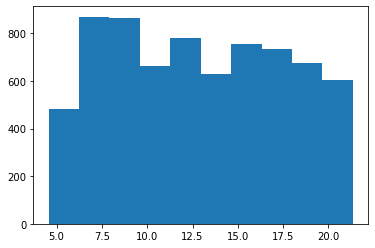

In [35]:
import matplotlib.pyplot as plot
plot.hist(mart['Item_Weight'])

In [76]:
mart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [84]:
mart['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [83]:
mart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [100]:
mart['Outlet_Establishment_Year'].dtype

dtype('int16')

In [99]:
mart['Outlet_Establishment_Year']=pd.to_numeric(mart['Outlet_Establishment_Year'],downcast='float')

In [107]:
mart['Item_Visibility']=pd.to_numeric(mart['Item_Visibility'],downcast='integer')
mart['Item_Visibility'].dtype

dtype('float64')

In [108]:
mart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int16
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [115]:
mart['Outlet_Establishment_Year'].dtype

dtype('int16')

In [112]:
mart['Outlet_Establishment_Year'].astype('category',copy=False)

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: category
Categories (9, int64): [1985, 1987, 1997, 1998, ..., 2002, 2004, 2007, 2009]

In [114]:
mart['Outlet_Establishment_Year'].astype('float')

0       1999.0
1       2009.0
2       1999.0
3       1998.0
4       1987.0
         ...  
8518    1987.0
8519    2002.0
8520    2004.0
8521    2009.0
8522    1997.0
Name: Outlet_Establishment_Year, Length: 8523, dtype: float64

In [125]:
mart.astype({'Outlet_Establishment_Year':'object','Item_MRP':'object'},copy=False).dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                      object
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [131]:
mart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int16
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [158]:
#exploring iloc and loc as alternates for idexing and their contrasting funcitonality

df = pd.DataFrame(np.random.randn(8, 4),
index = ['a','b','c','d','e','f','g','h'], columns = ['A', 'B', 'C', 'D'])

#select all rows for a specific column

df

,A,B,C,D
a,2.140755,-0.565788,-0.122760,-0.645199
b,-0.406832,-0.369744,0.280071,-1.231400
c,1.438213,-0.746958,-1.151608,-0.738979
d,-0.530230,0.782592,2.168659,0.203250
e,0.776569,-0.489559,1.530027,-0.878710
f,-0.268771,0.344031,-2.315638,-0.961886
g,1.241278,-1.373482,0.723948,-0.305052
h,0.282852,1.366014,-0.493734,0.507356


In [190]:
df.loc[:,'A']>df.loc['f','B']

a     True
b    False
c     True
d    False
e     True
f    False
g     True
h    False
Name: A, dtype: bool

In [178]:
mart.loc[:-9,('Item_Identifier','Item_Weight')]

,Item_Identifier,Item_Weight


In [192]:
mart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [360]:
%%timeit
mart[(mart.Item_Fat_Content=='LF')& (mart.Item_Type=='Dairy')&(mart.Item_Weight>10)].loc[420:,'Outlet_Size']

4.55 ms ± 508 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [228]:
print(mart.query('Item_Weight>20'))

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
43             FDC02        21.35          Low Fat         0.069103   
89             FDN27        20.85          Low Fat         0.039624   
90             FDW20        20.75          Low Fat         0.040421   
122            FDB14        20.25          Regular         0.171939   
129            NCP30        20.50          Low Fat         0.032835   
...              ...          ...              ...              ...   
8500           NCQ42        20.35          Low Fat         0.000000   
8503           FDQ44        20.50          Low Fat         0.036133   
8512           FDR26        20.70          Low Fat         0.042801   
8515           FDH24        20.70          Low Fat         0.021518   
8517           FDF53        20.75              reg         0.083607   

                  Item_Type  Item_MRP Outlet_Identifier  \
43                   Canned  259.9278            OUT018   
89                     Meat  

In [229]:
mart[mart['Item_Weight']>20]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
89,FDN27,20.85,Low Fat,0.039624,Meat,117.2808,OUT049,1999,Medium,Tier 1,Supermarket Type1,1523.3504
90,FDW20,20.75,Low Fat,0.040421,Fruits and Vegetables,122.1730,OUT010,1998,NaN,Tier 3,Grocery Store,369.5190
122,FDB14,20.25,Regular,0.171939,Canned,92.5120,OUT010,1998,NaN,Tier 3,Grocery Store,186.4240
129,NCP30,20.50,Low Fat,0.032835,Household,40.2822,OUT045,2002,NaN,Tier 2,Supermarket Type1,707.0796
...,...,...,...,...,...,...,...,...,...,...,...,...
8500,NCQ42,20.35,Low Fat,0.000000,Household,125.1678,OUT017,2007,NaN,Tier 2,Supermarket Type1,1907.5170
8503,FDQ44,20.50,Low Fat,0.036133,Fruits and Vegetables,120.1756,OUT035,2004,Small,Tier 2,Supermarket Type1,3392.9168
8512,FDR26,20.70,Low Fat,0.042801,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392
8515,FDH24,20.70,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880


In [242]:
xyy=mart[(mart.Item_Weight)>20]

In [ ]:
#formatting variables
#datatime
#imputation
#regularexpressions 
#missing values

In [274]:
def colornan(i):
    if i==None:
        color='red'
    else:
        color='blue'
    return 'color:%s'%color

In [275]:
xyz2=xyy.style.applymap(colornan)

In [276]:
xyz2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.350000,Low Fat,0.069103,Canned,259.927800,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.522800
89,FDN27,20.850000,Low Fat,0.039624,Meat,117.280800,OUT049,1999,Medium,Tier 1,Supermarket Type1,1523.350400
90,FDW20,20.750000,Low Fat,0.040421,Fruits and Vegetables,122.173000,OUT010,1998,nan,Tier 3,Grocery Store,369.519000
122,FDB14,20.250000,Regular,0.171939,Canned,92.512000,OUT010,1998,nan,Tier 3,Grocery Store,186.424000
129,NCP30,20.500000,Low Fat,0.032835,Household,40.282200,OUT045,2002,nan,Tier 2,Supermarket Type1,707.079600
148,FDA45,21.250000,Low Fat,0.155350,Snack Foods,178.237000,OUT035,2004,Small,Tier 2,Supermarket Type1,529.311000
226,FDW20,20.750000,Low Fat,0.024129,Fruits and Vegetables,124.173000,OUT013,1987,High,Tier 3,Supermarket Type1,2956.152000
271,FDS26,20.350000,Low Fat,0.089395,Dairy,260.159400,OUT013,1987,High,Tier 3,Supermarket Type1,2093.275200
283,DRE49,20.750000,Low Fat,0.021370,Soft Drinks,153.002400,OUT017,2007,nan,Tier 2,Supermarket Type1,2277.036000
288,FDB57,20.250000,Regular,0.018802,Fruits and Vegetables,222.177200,OUT035,2004,Small,Tier 2,Supermarket Type1,5559.430000


In [307]:
#missing values
mart['Outlet_Size'].isnull()

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [304]:
mart['Outlet_Size'].replace({'nan':None,'High':'HHH'},inplace=True)


In [329]:
mart['Outlet_Size'].unique()


array(['Medium', nan, 'HHH', 'Small'], dtype=object)

In [323]:
#changes to datatype are not reflecting in the dataset
#na count nahi kar raaha
mart.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [324]:
mart['Outlet_Size'].isnull().count()

8523

In [331]:
mart.__dict__

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object')
 Axis 1: RangeIndex(start=0, stop=8523, step=1)
 FloatBlock: [ 1  3  5 11], 4 x 8523, dtype: float64
 IntBlock: slice(7, 8, 1), 1 x 8523, dtype: int64
 ObjectBlock: [ 0  2  4  6  8  9 10], 7 x 8523, dtype: object,
 '_item_cache': {'Outlet_Size': 0       Medium
  1       Medium
  2       Medium
  3          NaN
  4          HHH
           ...  
  8518       HHH
  8519       NaN
  8520     Small
  8521    Medium
  8522     Small
  Name: Outlet_Size, Length: 8523, dtype: object},
 '_attrs': {},
 '_flags': <Flags(allows_duplicate_labels=True)>}

<method 'rfind' of 'str' objects>

In [343]:
%magic

In [342]:
%whereami

UsageError: Line magic function `%whereami` not found.


In [347]:
import numpy

In [350]:
%%timeit

x = numpy.random.randn(1000)


52.8 µs ± 5.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [351]:
%history

mart['Iten_Low_Content']
mart.tail()
import numpy as np
import pandas as pd
import matplotlib as plot
import statsmodels as stat
heart=pd.read_csv('C:/Users/god\'s pride/heart.csv')
heart
mart=pd.read_csv('C:/Users/god\'s pride/train.csv')
mart.head()
mart['Iten_Low_Content']
mart['Iten_Fat_Content']
mart['Item_Fat_Content']
mart['Item_Fat_Content'].unique()
mart.tail()
#that one value in a column is replaced with another

mart['Item_Fat_Content'].replace((('Low Fat','low fat'): 'LF'),inplace=true)
#that one value in a column is replaced with another

mart['Item_Fat_Content'].replace({('Low Fat','low fat'): 'LF'},inplace=true)
#that one value in a column is replaced with another

mart['Item_Fat_Content'].replace({('Low Fat','low fat'): 'LF'},inplace=True)
#that one value in a column is replaced with another

mart['Item_Fat_Content'].replace({('Low Fat','low fat'): ('LF')},inplace=True)
#that one value in a column is replaced with another

mart['Item_Fat_Content'].replace({'Low Fat': 'L

In [354]:
!cd

C:\Users\god's pride


In [364]:
import numpy as np
np.__version__

'1.19.5'

In [365]:
np.full((3,5),31.14)

array([[31.14, 31.14, 31.14, 31.14, 31.14],
       [31.14, 31.14, 31.14, 31.14, 31.14],
       [31.14, 31.14, 31.14, 31.14, 31.14]])